notes for Chapter 2 of *Theoretical Neuroscience* by P. Dayan and L. F. Abbott.

## 2.2 Estimating Firing Rates

### pp. 46 preprocessing of stimulus

> As discussed in chapter 1, sensory systems tend to adapt to the absolute intensity of a stimulus. ... This means that the time integral of $s(t)$ over the duration of a trial is 0.

In addition to subtraction of the mean, I don't know whether we should use raw $s(t)$ or some transformation of it, such as log, to account for Weber's law, etc. I guess we don't. Also, check notes for 2.3

### pp. 46 Volterra expansion and Wiener expansion

> This series was rearranged by Wiener to make the terms easier to compute.

Check <http://www.scholarpedia.org/article/Volterra_and_Wiener_series> and [A Unifying View of Wiener and Volterra Theory and Polynomial Kernel Regression](http://dx.doi.org/10.1162/neco.2006.18.12.3097) ([another link](http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/nc05_[0].pdf)).

Essentially, for finite order cases, they are essentially the same. They will begin to differ in terms of convergence using infinite series.

> Clearly, the relaxed conditions on convergence make the Wiener class of systems much larger than the Volterra class, however there are some systems that can be represented by an infinite Volterra series, but not by a Wiener series (Palm & Poggio, 1977, Korenberg & Hunter, 1990). In contrast, a truncated Wiener or Volterra series can always be transformed into its truncated counterpart

For neuroscience practice, they are really the same thing: linear regression with polynomial features.

### pp. 49 static nonlinearities

here, the method to estimate nonlinearity is same as in Nicole Rust's Neuron paper [Spatiotemporal Elements of Macaque V1 Receptive Fields](https://doi.org/10.1016/j.neuron.2005.05.021): doing scatter plot.

There are various nonlinearity functions, just as tuning curves in the real brain. Not sure if people have found evidence for these nonlinearity functions in the brain.

> A theorem due to Bussgang (see appendix C) suggests that equation 2.6 will provide a reasonable kernel, even in the presence of a static nonlinearity, if the white noise stimulus used is Gaussian.

Check my notes on Appendix C.

### pp. 51 Figure 2.3. Standard Linear-nonlinear-Poisson pipeline.

### pp. 51 limitation of linear kernel.

> In some cases, the linear term of the Volterra series fails to predict the response even when static nonlinearities are included. Systematic improve- ments can be attempted by including more terms in the Volterra or Wiener series, but in practice it is quite difficult to go beyond the first few terms. ... (see Eq. (2.12) ... A reasonable choice for this function is the response tuning curve.

this "tuning curve" is just the response of neuron to stimulus, when the stimulus is static across time.

However, this just shifts the problem to computing tuning curve, and creates difficulty for predicting response for arbitrary stimulus (usually, tuning curve function is either nonparameteric, or depending on parametrization of stimulus).

## 2.3 Introduction to the Early Visual System

mostly skipped. for the part about retinotopic map, check errata for some major correction.

### pp. 58 visual stimuli

> To avoid dealing with adapta- tion effects, we describe the stimulus by a function $s(x, y, t)$ that is proportional to the difference between the luminance at the point $(x, y)$ at time $t$ and the average or background level of luminance. Often $s(x, y, t)$ is also divided by the background luminance level, making it dimensionless. The resulting quantity is called the contrast.

I wonder if I need to do log, etc. Again, I think it's best to work with raw value, and change if it doesn't work.

For example, in machine learning, people usually use gamma-corrected pixel values, instead of luminance. Seems that few people study this. Check [Color-to-Grayscale: Does the Method Matter in Image Recognition?](https://dx.doi.org/10.1371%2Fjournal.pone.0029740). Seems that linear is worst for recognition purpose. So using gamma-correction is good for machine learning people.

Eq. (2.18) is the definition of counterphase sinusoidal grating. I think "counterphase" is due to the time term. Over time, max ampliteude in the stimulus will change. This is different from drifting grating, where max amplitude doesn't change across time. I think drifting grating is often used in Lee Lab and this grating is also mentioned in some other books as standard stimuli, such as Chapter 6 of [
Natural Image Statistics](http://www.naturalimagestatistics.net)

## 2.4 Reverse-Correlation Methods: Simple Cells

Notice that, in 2.4 and 2.5, sometimes they talk about spatial only, sometimes they talk about spatial-temporal.

### pp. 64 Eq. (2.28) Bandwidth of Gabor functions.

I think this is mentioned in Lee's [Image representation using 2D Gabor wavelets](https://doi.org/10.1109/34.541406) as well. Bandwidth characterizes Gabor function in terms of frequency domain.

### pp. 65 temporal receptive fields

> Reversal effects like those seen in figure 2.13 are a common feature of space-time receptive fields.

Check Figures 2.13 and 2.14. these might be important for one to characterize neural response accurately. However, they are all discarded in Tang's data.

### pp. 68 space-time receptive fields

here people usually assume the stimulus is bar, because in this case, we can describe stimulus in 1D, and it's easy to plot spatial temporal RF in 2D.

### pp. 73 Eq. (2.38)

based on description of this equation, I believe it's closely related to divisive normalization that Heeger and other people talk about.

## 2.5 Static Nonlinearities: Complex Cells

Here they talk about quadrature in (2D) spatial, not (1D, bar) spatial-temporal. In classical papers about energy models, they use spatial-temporal. See [Spatiotemporal energy models for the perception of motion](https://doi.org/10.1364/JOSAA.2.000284) or [this link](http://persci.mit.edu/pub_pdfs/spatio85.pdf). In certain situations, they are connected. For example, if the stimulus keeps the amplitude constant, and only change the spatial phase along time, then spatial-temporal quadrature seems to be the same as spatial quadrature.

Notice that complex cell has a quadrature pair, and the baseline phase of the pair will affect the result.

> Although it is not visible in the figure, there is a weak dependence on $\Phi$ when the exact expressions are used.

Below is a verification of this statement. However, I'm not sure if $\phi$ will affect result at all. The experiments below shows some fluctuation at machine precision level, and I'm not sure whether to believe it or not.

In [1]:
# here I use static grating.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState

In [2]:
# two periods
num_period = 2
num_point_per_period = 128
sampling_space = np.pi*2/num_point_per_period
# this 0.5 fix is similar to that in 
# <https://github.com/leelabcnbc/leelab-toolbox/blob/dba5f7741a86cf5bad9bcbf9d77d53b2e883effe/leelabtoolbox/preprocessing/transformers.py#L483-L489>
x_grid_int = np.linspace(-num_period//2*num_point_per_period+0.5,
                     +num_period//2*num_point_per_period-0.5,
                      num_point_per_period*num_period)
x_grid = x_grid_int * sampling_space

def stimulus(K, phi):
    return np.cos(x_grid*K-phi)

def gabor_1d(k, phi):
    return np.exp(-np.square(x_grid))*np.cos(k*x_grid-phi)

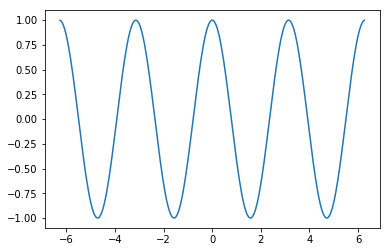

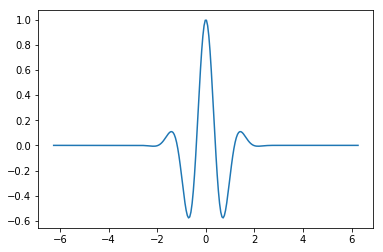

In [3]:
k_gabor = 4
phi_gabor = 0
K_stimulus = 2
phi_stimulus = 0

plt.close('all')
plt.plot(x_grid, stimulus(K_stimulus, phi_stimulus))
plt.show()

plt.close('all')
plt.plot(x_grid, gabor_1d(k_gabor, phi_gabor))
plt.show()

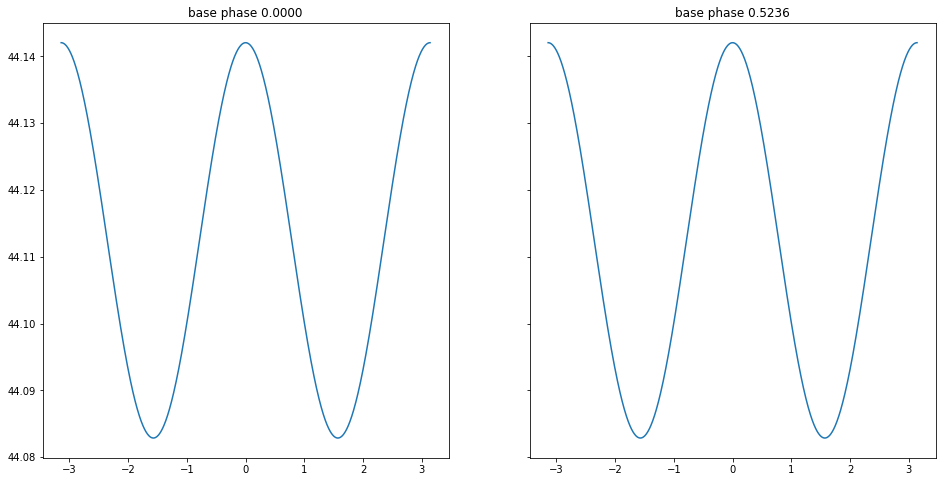

In [4]:
# ok. let's generate a complex gabor pair.
def complex_gabor_pair(k, phi):
    gabor1 = gabor_1d(k, phi)
    gabor2 = gabor_1d(k, phi + np.pi/2)
    return gabor1, gabor2

def complex_response(k, phi, stim):
    # here I didn't normalize the delta t, but it should be fine, since I use the same resolution throughout.
    gabor1, gabor2 = complex_gabor_pair(k, phi)
    return (gabor1@stim)**2 + (gabor2@stim)**2

# ok. time to check
# this I didn't do any 0.5 correction. It's irrelevant.
phi_stimulus_list = np.linspace(-np.pi, np.pi, 1024)
phi_gabor_list = (0, np.pi/6)
plt.close('all')
fig, axes = plt.subplots(1, len(phi_gabor_list), sharex=True, sharey=True, figsize=(16, 8))
result_list_all = []
for case_idx, gabor_phi_this in enumerate(phi_gabor_list):
    result_this = np.asarray([complex_response(k_gabor, gabor_phi_this,  stimulus(K_stimulus, phi_stimulus_this)) for phi_stimulus_this in phi_stimulus_list])
    ax_this = axes[case_idx]
    ax_this.plot(phi_stimulus_list, result_this)
    ax_this.set_title('base phase {:.4f}'.format(gabor_phi_this))
    result_list_all.append(result_this)
plt.show()

# as you can see, definitely response has dependence on stimulus phase.
# you can change k_gabor as well. usually, lower k will make curve have more fluctuation.

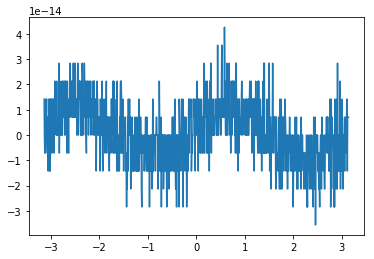

In [5]:
plt.close('all')
plt.plot(phi_stimulus_list, result_list_all[0]-result_list_all[1])
plt.show()
# there's definitely some structure here... but the dependence is really small.
# hard to tell whether it's real or numerical issue or not.

## 2.7 Constructing V1 Receptive Fields

> Models of complex cells can be constructed without introducing a squaring nonlinearity.

I don't know. If this squaring is just for introducing phase invariance, we can be without it. However, squaring also introduces some nonlinearity. If you don't have this square, then nonlinearity is different.

## Appendix

### A

I believe it's just design matrix and least square and all that stuffs, plus some Fourier transform stuff for non-white stimuli, which I never see in practice. In practice, I believe using linear regression is fine, and this FT stuff violates the crucial causality property.

### B

just standard Lagrange stuff. Notice Eq. (2.62) has $t$ in it. This is because they are solving for the best stimulus at time $t$.

### C

Check [Liam's paper Convergence properties of three spike-triggered analysis techniques](http://dx.doi.org/10.1088/0954-898X_14_3_304) or [here](http://www.stat.columbia.edu/~liam/research/pubs/sta-network.pdf). He said the theorems about STA in his paper is very similar to what Bussgang said. I feel here in TN book, the presentation is confusing. So just check that paper.